In [39]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
SET3_M01 = pd.read_csv("SET3/SET3_M01.CSV", header = None, names = ["user_id", "timestamp", "arrondissement_id"])

In [3]:
SET3_M01.head()

,user_id,timestamp,arrondissement_id
0,37509,2013-01-29 15:00:00,3
1,84009,2013-01-14 07:00:00,3
2,84009,2013-01-14 07:00:00,3
3,84009,2013-01-14 07:00:00,3
4,80150,2013-01-27 16:50:00,3


In [4]:
SET3_M01.shape

(43034439, 3)

In [7]:
n_user = len(SET3_M01.user_id.unique())
n_user

146352

In [25]:
most_active_users = SET3_M01.user_id.value_counts()[:100]
most_active_users.index

Int64Index([ 29741, 115669, 145890, 145762, 101780,  92583,  28765,  87604,
            101855, 107792, 127730,  92240,  13891,  86115,  48980, 101701,
             91665,  87173,  25832,  78849,  41280,  81833, 148777,  33108,
            115364, 127341, 129963,  27595,  71657,  45993,  29689, 128839,
            111876,  43849, 112159,  17970,  12429,  68908,  74900,   6037,
            124270,  67670,  35618,  87609,  88454,  77536,  26169, 115710,
            119082,  57297, 122007,  51935,  94584, 139337,  79808,  84043,
             85262, 117044,  12960,  75593, 117855, 114672, 127979, 123940,
             56885,   8969,   1325, 100780,  96290,  50040, 103869,  50323,
             10572,  87460,  31722,  17247,   5898,  45608,  70530, 133630,
            127150,  26662,  79964, 117018,  58676, 124386, 116262,   6011,
             25782,  96096,  52888,  28202,  26199, 115924,  92697,  37231,
             65478,  47767, 136231,  13342],
           dtype='int64')

In [28]:
arrondissements = pd.read_csv("ContextData/SENEGAL_ARR.csv")

In [29]:
arrondissements.head()

,ARR_ID,REG,DEPT,ARR
0,1,DAKAR,DAKAR,PARCELLES ASSAINIES
1,2,DAKAR,DAKAR,ALMADIES
2,3,DAKAR,DAKAR,GRAND DAKAR
3,4,DAKAR,DAKAR,DAKAR PLATEAU
4,5,DAKAR,GUEDIAWAYE,GUEDIAWAYE


In [34]:
arrondissements.REG.unique()

array(['DAKAR', 'THIES', 'DIOURBEL', 'FATICK', 'LOUGA', 'KAOLACK',
       'KAFFRINE', 'SAINT-LOUIS', 'KOLDA', 'SEDHIOU', 'ZIGUINCHOR',
       'KEDOUGOU', 'TAMBACOUNDA', 'MATAM'], dtype=object)

In [36]:
import shapefile

In [37]:
shape_senegal = shapefile.Reader("ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp")
print(shape_senegal)    

shapefile Reader
    123 shapes (type 'POLYGON')
    123 records (5 fields)


In [38]:
len(shape_senegal.shapes())


123

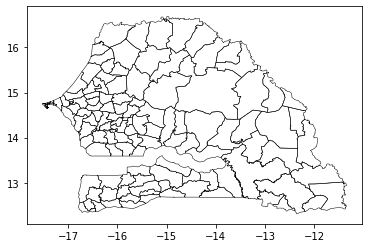

In [61]:
plt.figure()
for shape in shape_senegal.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, color = "black", lw = 0.5)
    
#plt.savefig('test.png')

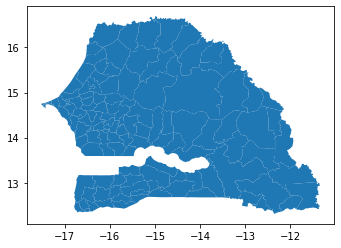

In [60]:
import geopandas
import descartes
df = geopandas.read_file("ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp")
df.plot()

In [52]:
?descartes.PolygonPatch